# Mathematics for creating a new probability distribution from limited data using scaling

Sometimes the data that we need for the stroke outcome model does not exist and must be created by combining multiple other sources of data. In this case, we want to define a new probability distribution of the modified Rankin scale (mRS) scores across a patient population, and we have two pieces of data to combine. The first, $P_\mathrm{new}$, is a single known probability for the new distribution. The second is an existing probability distribution. 

We will take the distribution where the probabilities are known for all mRS and scale the probability bins around the single known point in the new distribution. In this case, we'll scale a pre-stroke probability distribution around a chosen point for $P_{\mathrm{new}}(\mathrm{mRS}\leq 1)$.

### The scaling method

To create the new distribution, we initially want to set $P_{\mathrm{new}}(\mathrm{mRS}\leq 1)$ to the known value. To find the other mRS values, we start with the pre-stroke bins only and find the size ratio of each mRS bin to the mRS$\leq1$ bin. By carrying the ratios over to the new distribution, we can define the new points.

For example:
+ The pre-stroke mRS<=1 area $G_P$ covers only mRS=0 and mRS=1. 
+ The pre-stroke mRS=0 bin covers some known percentage $G_{P0}$% of the full area $G_P$. 
+ We set the new mRS=0 bin to be $G_{P0}$% of the size of the $t=0$ mRS$\leq1$ bin, $G$.

For mRS>1, we instead keep the same size ratio of each bin to the combined mRS>1 bins. 

---

## Notebook admin

In [1]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

---

## Collect the available data

These data are copied over from `mRS_datasets.ipynb`. Distribution of mRS pre-stroke for patients with nLVO, from the SAMueL-1 data set:

In [4]:
bins_pre_stroke = np.array(
    [0.5829, 0.1625, 0.1034, 0.1022, 0.042 , 0.0069, 0.    ])
bins_cumsum_pre_stroke = np.cumsum(bins_pre_stroke)

Say that we only know the following point of the new distribution, $P_{\mathrm{new}}(\mathrm{mRS}\leq1)=0.2322$:

In [5]:
p_mRSleq1_new = 0.2322

---

## Plot the known data:

To save repetition we'll define some functions to draw a stacked bar chart and to draw horizontal arrows <-->.

In [6]:
from outcome_utilities.dist_plot import draw_horizontal_bar

In [7]:
def draw_horizontal_arrow(x_left,x_right,y,label='', fontsize=None):
    """
    Draw an arrow <-> with a label below it.
    
    x_left, x_right, y - float or int. The coordinates of the arrow.
    label              - string. Optional label to add above the arrow.
    """
    # Draw a horizontal arrow between x_left and x_right at height y:
    plt.annotate('', xy=(x_left,y), xytext=(x_right,y),
                 arrowprops=dict(arrowstyle='<->'))
    # and add a label for the arrow:
    plt.annotate(label, xy=(0.5*(x_left+x_right),y-0.1), ha='center',
                 fontsize=fontsize)

Plot the stacked bar charts:

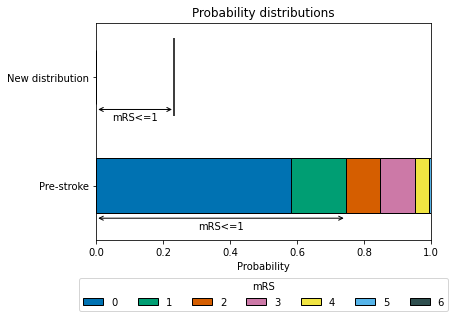

In [8]:
y_vals = [1,0]
y_labels = ['New distribution', 'Pre-stroke']

# Draw the pre-stroke distribution: 
draw_horizontal_bar(bins_pre_stroke, y_vals[1])
# Add legend now to prevent doubling all the labels:
plt.legend(loc='center',ncol=7, title='mRS',
           bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.

# Set up an empty bar for the t=0 distribution:
draw_horizontal_bar([0.0], y_vals[0])
# Draw a vertical line where mRS<=1:
plt.scatter(p_mRSleq1_new, 1.0, marker='|', color='k', s=6000)

# Annotate where mRS<=1.
draw_horizontal_arrow(0.0, p_mRSleq1_new, y=0.7, label='mRS<=1')
draw_horizontal_arrow(0.0, bins_cumsum_pre_stroke[1],
                      y=-0.3, label='mRS<=1')

# Other setup:
plt.xlabel('Probability')
plt.xlim(0,1)
plt.ylim(-0.5,1.5)       
plt.yticks(y_vals, y_labels)
plt.title('Probability distributions')
plt.show()

The point where mRS$\leq$1 is different in each of the distributions. 

---

### Calculate the scaled distribution

The function that we have written to do this scaling is stored in a package in the `outcome_utilities` directory. 

In [9]:
from outcome_utilities.scale_dist import scale_dist

In [10]:
scale_dist??

Signature: scale_dist(mrs_prob_bins, p_ref, mRS_ref)
Source:   
def scale_dist(mrs_prob_bins,p_ref,mRS_ref):
    """
    Scale an existing probability distribution to a new data point.

    Inputs:
    mrs_prob_bins - list or np.array. Prob. dist to be scaled.
    p_ref         - float. Reference probability.
    mRS_ref       - int. The mRS bin of this reference probability.

    Returns:.
    mrs_prob_dist_sc - np.array. Prob. dist after scaling.
    mrs_prob_bins_sc - np.array. Cumulative prob. dist after scaling.
    """
    # Store the scaled bins in mrs_prob_bins_sc:
    mrs_prob_bins_sc = []

    for mRS in range(len(mrs_prob_bins)):
        if mRS<=mRS_ref:
            # For the points below the new reference p_ref.
            # Find the size ratio of this bin to the mRS<=mRS_ref bin.
            # When mRS=mRS_ref, ratio=1.
            ratio = mrs_prob_bins[mRS] / mrs_prob_bins[mRS_ref]
            # Scale the bins:
            mrs_prob_bins_sc.append(p_ref * ratio)
        e

$\phantom{gap}$

Use this function to scale our bins:

In [11]:
bins_new, bins_cumsum_new = (
    scale_dist(bins_cumsum_pre_stroke, p_mRSleq1_new, mRS_ref=1))

In [12]:
bins_new

array([0.18157953, 0.05062047, 0.31182451, 0.30820566, 0.12665986,
       0.02080841, 0.        ])

In [13]:
bins_cumsum_new

array([0.18157953, 0.2322    , 0.54402451, 0.85223016, 0.97889002,
       0.99969843, 0.99969843])

---

### Plot the two distributions:

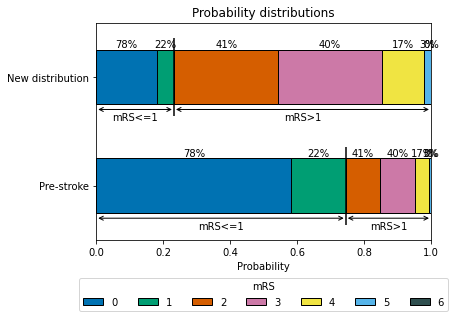

In [14]:
y_vals = [1,0]
y_labels = ['New distribution', 'Pre-stroke']

# Draw the pre-stroke distribution: 
draw_horizontal_bar(bins_new, y_vals[0])
# Add legend now to prevent doubling all the labels:
plt.legend(loc='center',ncol=7, title='mRS',
           bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.

# Draw the t=0 distribution:
draw_horizontal_bar(bins_pre_stroke, y_vals[1])

# Add labels:
dists = [bins_pre_stroke, bins_new]
for i,dist in enumerate(dists):
    # Draw a vertical line where mRS<=1:
    plt.scatter(np.sum(dist[:2]), i, marker='|', color='k', s=6000, zorder=4)
    
    # Annotate where mRS<=1 and mRS>1:
    draw_horizontal_arrow(0.0, np.sum(dist[:2]), y=i-0.3, label='mRS<=1')
    draw_horizontal_arrow(np.sum(dist[:2]), 1.0, y=i-0.3, label='mRS>1')

    for j in range(len(dist)):
        if j<2:
            big_bin_size = np.sum(dist[:2])    # sum of mRS<=1 bins
        else:
            big_bin_size = np.sum(dist[2:])    # sum of mRS>1 bins

        size_ratio = dist[j] / big_bin_size
        
        # Define the middle x-coordinate of the bin: 
        midpoint = np.mean([np.sum(dist[:j]), np.sum(dist[:j+1])])
        
        # Write the percentage size ratio:
        plt.annotate(f'{size_ratio*100:1.0f}%', xy=(midpoint,i+0.3), 
                     ha='center', va='center') # text alignment
    
# Other setup:
plt.xlabel('Probability')
plt.xlim(0,1)
plt.ylim(-0.5,1.5)       
plt.title('Probability distributions')
plt.yticks(y_vals, y_labels)
plt.show()

For example, the mRS=0 bin covers 78% of the combined mRS$\leq$1 bins in the original pre-stroke distribution, and the new scaled distribution keeps this size ratio. Similarly, the mRS=2 bin covers 41% of the combined mRS>1 bins in both cases.